# Object Recognition CIFAR-100

Problem statement:
Develop a robust image classification model capable of accurately categorizing images from the CIFAR-100 dataset into one of the 100 specified sub classes or 20 super classes. The goal is to create a model that can generalize well to diverse image categories and achieve high accuracy on both training and unseen test data. Implement two methods and compare them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import islice
# from imgaug import augmenters as iaa # to augment dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Description of dataset

The CIFAR-100 dataset consists of 60,000 32x32 pixel color images, divided into 100 classes, with each class containing 600 images. The dataset is split into a training set (50,000 images) and a test set (10,000 images).

In [3]:
# Depending on where the datasets are saved:
loc = "drive/MyDrive/Colab Notebooks/Datasets/"

In [4]:
# Load datasets
x_train = np.load(loc + "trnImage.npy")                 # trnImage, 32x32x3x50000
y_train_fine = np.load(loc + "trnLabel_fine.npy")       # trnLabel_fine, 50000 vec
y_train_coarse = np.load(loc + "trnLabel_coarse.npy")   # trnLabel_coarse, 50000 vec
x_test = np.load(loc + "tstImage.npy")                  # tstImage, 32x32x3x10000
y_test_fine = np.load(loc + "tstLabel_fine.npy")        # tstLabel_fine, 10000 vec
y_test_coarse = np.load(loc + "tstLabel_coarse.npy")    # tstLabel_coarse, 10000 vec
fine_labels = pd.read_csv(loc + "fine_labels.csv")      # Fine labels
coarse_labels = pd.read_csv(loc + "coarse_labels.csv")  # Coarse labels

#### **Data exploration**

In [5]:
# Print shapes of the matrices
print(f"Shape of {'Train_Images' : <23}: {str(x_train.shape) : <10}")
print(f"Shape of {'Train_Labels_Fine' : <23}: {str(y_train_fine.shape) : <10}")
print(f"Shape of {'Train_Labels_Coarse' : <23}: {str(y_train_coarse.shape) : <10}")
print(f"Shape of {'Test_Images' : <23}: {str(x_test.shape) : <10}")
print(f"Shape of {'Test_Labels_Fine' : <23}: {str(y_test_fine.shape) : <10}")
print(f"Shape of {'Test_Labels_Coarse' : <23}: {str(y_test_coarse.shape) : <10}")

Shape of Train_Images           : (32, 32, 3, 50000)
Shape of Train_Labels_Fine      : (50000,)  
Shape of Train_Labels_Coarse    : (50000,)  
Shape of Test_Images            : (32, 32, 3, 10000)
Shape of Test_Labels_Fine       : (10000,)  
Shape of Test_Labels_Coarse     : (10000,)  


Transpose the datasets to convert them into standard form to make operations easy.

Sample number should be on the front followed by the sample itself.

In this case, [i, j, k, l], 
where,
i is the image number,
jxk are 32x32 grid of image
l is RGB color channels

In [6]:
x_train = np.transpose(x_train, [3,0,1,2])
x_test = np.transpose(x_test, [3,0,1,2])

print(f"New shape of {'Train_Images' : <23}: {str(x_train.shape) : <10}")
print(f"New shape of {'Test_Images' : <23}: {str(x_test.shape) : <10}")


New shape of Train_Images           : (50000, 32, 32, 3)
New shape of Test_Images            : (10000, 32, 32, 3)


In [7]:
y_lab_fine, per_class_fine = np.unique(y_train_fine, return_counts=True)
y_lab_coarse, per_class_coarse = np.unique(y_train_coarse, return_counts=True)

In [8]:
num_unique_fine_labels = len(y_lab_fine)
num_unique_coarse_labels = len(y_lab_coarse)

print(f"{'Number of classes in Fine Labels' : <35}: {num_unique_fine_labels}")
print(f"{'Number of classes in Coarse Labels' : <35}: {num_unique_coarse_labels}")

Number of classes in Fine Labels   : 100
Number of classes in Coarse Labels : 20


In [9]:
sub_class = dict(zip(np.unique(y_train_fine), fine_labels))
super_class = dict(zip(np.unique(y_train_coarse), coarse_labels))

In [10]:
# Super class labels
super_class

{0: 'aquatic mammals',
 1: 'fish',
 2: 'flowers',
 3: 'food containers',
 4: 'fruit and vegetables',
 5: 'household electrical devices',
 6: 'household furniture',
 7: 'insects',
 8: 'large carnivores',
 9: 'large man-made outdoor things',
 10: 'large natural outdoor scenes',
 11: 'large omnivores and herbivores',
 12: 'medium-sized mammals',
 13: 'non-insect invertebrates',
 14: 'people',
 15: 'reptiles',
 16: 'small mammals',
 17: 'trees',
 18: 'vehicles 1',
 19: 'vehicles 2'}

In [11]:
# for every super label there are 2500 images in train set
print(np.asarray((y_lab_coarse, per_class_coarse)).T)

[[   0 2500]
 [   1 2500]
 [   2 2500]
 [   3 2500]
 [   4 2500]
 [   5 2500]
 [   6 2500]
 [   7 2500]
 [   8 2500]
 [   9 2500]
 [  10 2500]
 [  11 2500]
 [  12 2500]
 [  13 2500]
 [  14 2500]
 [  15 2500]
 [  16 2500]
 [  17 2500]
 [  18 2500]
 [  19 2500]]


In [12]:
# First 20 labels in Sub class
for key, value in islice(sub_class.items(), 20):
    print(key, value)

0 apples
1 aquarium fish
2 baby
3 bear
4 beaver
5 bed
6 bee
7 beetle
8 bicycle
9 bottles
10 bowls
11 boy
12 bridge
13 bus
14 butterfly
15 camel
16 cans
17 castle
18 caterpillar
19 cattle


In [13]:
# print for only first 20 labels,
# for every label in sub class, there are 500 images in the train set
print(np.asarray((y_lab_fine, per_class_fine)).T[:20])

[[  0 500]
 [  1 500]
 [  2 500]
 [  3 500]
 [  4 500]
 [  5 500]
 [  6 500]
 [  7 500]
 [  8 500]
 [  9 500]
 [ 10 500]
 [ 11 500]
 [ 12 500]
 [ 13 500]
 [ 14 500]
 [ 15 500]
 [ 16 500]
 [ 17 500]
 [ 18 500]
 [ 19 500]]


Super Class: vehicles 2
Sub Class: tank


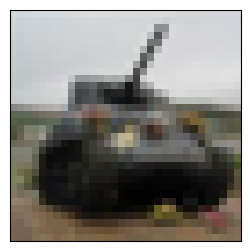

In [14]:
# testing

img_n = np.random.randint(0,1000)
plt.figure(figsize=(3,3))
plt.xticks([])
plt.yticks([])
plt.imshow(x_train[img_n, :, :, :])
print(f"Super Class: {super_class[y_train_coarse[img_n]]}")
print(f"Sub Class: {sub_class[y_train_fine[img_n]]}")

In [15]:
def plot_sixteen(x, y, string="True Labels for sub classes", labels=sub_class):
    """
    Plot 4x4 grid of random images and label them with the input y
    """
    figs, axes = plt.subplots(4, 4, figsize=(10, 10))
    plt.suptitle(string, fontsize=18)

    for i in range(0, 4):
        for j in range(0, 4):
            img_n = np.random.randint(0, len(x))
            axes[i,j].imshow(x[img_n])
            axes[i,j].set_title(labels[y[img_n]])
            axes[i,j].axis('off')
    plt.show()

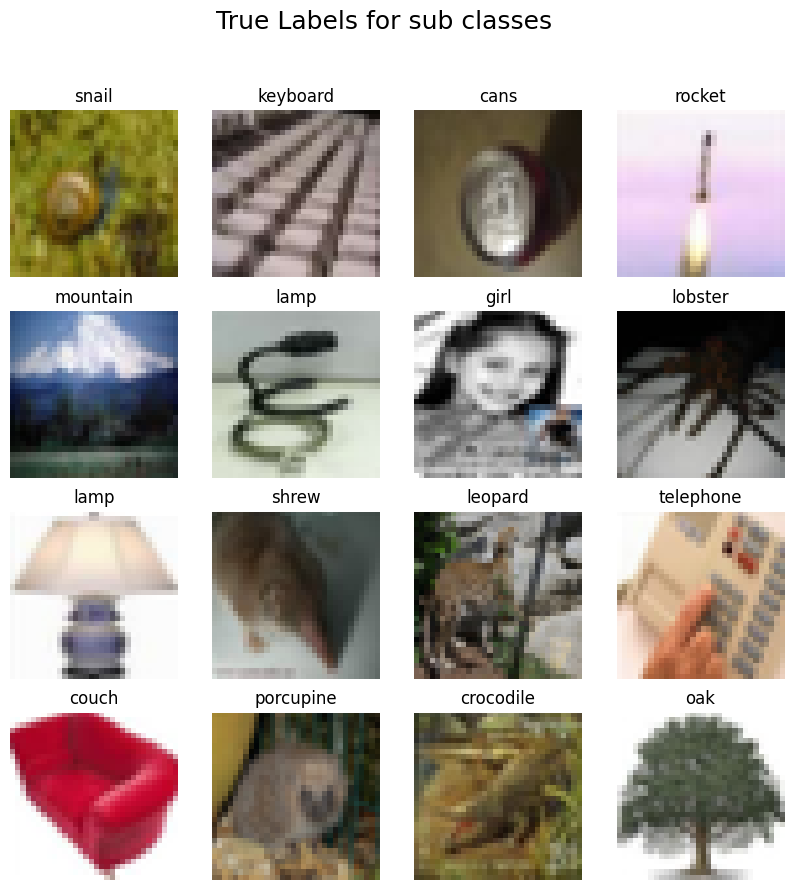

In [16]:
plot_sixteen(x_train, y_train_fine)

## **METHOD-1 With Convolutional Neural Network**
---
---

In [17]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

### Function definitions

In [18]:
# Normalizing datasets to bring them in range [0, 1]

x_train_norm = x_train.astype("float32") / 255.0
x_test_norm = x_test.astype("float32") / 255.0

In [19]:
def cnn_seq(num_classes):
    """
    A wrapper function to create same architecture for fine and coarse models.

    PARAMETER:
    num_classes number of classes

    RETURNS:
    object of the predefinited Sequential architecture
    """

    return keras.Sequential([keras.Input(shape=(32, 32, 3)),
                          layers.Conv2D(32, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', activation="relu"),
                          layers.Conv2D(32, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', activation="relu"),
                          layers.MaxPooling2D(pool_size=(2, 2)),
                          layers.Dropout(0.25),
                          layers.Conv2D(64, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', activation="relu"),
                          layers.Conv2D(64, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', activation="relu"),
                          layers.MaxPooling2D(pool_size=(2, 2)),
                          layers.Dropout(0.25),
                          layers.Conv2D(128, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', activation="relu"),
                          layers.Conv2D(128, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', activation="relu"),
                          layers.MaxPooling2D(pool_size=(2, 2)),
                          layers.Dropout(0.25),
                          layers.Flatten(),
                          layers.Dense(128, kernel_initializer='he_uniform', activation="relu"),
                          layers.Dropout(0.25),
                          layers.Dense(128, kernel_initializer='he_uniform', activation="relu"),
                          layers.Dense(num_classes, activation="softmax"),
                          ])

In [20]:
def print_acc_loss(history):
    """
    Plots classification accuracy
    and cross entropy loss graph.
    """

    fig, ax = plt.subplots(1, 2, figsize=(13, 5))

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
    ax[0].set_title('Classification Accuracy')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])

    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend(['Training Loss', 'Validation Loss'])
    ax[1].set_title('Cross Entropy Loss')

    plt.show()

In [21]:
def print_confusion_matrix(y_true, y_pred, ticks=True):
    """
    Calculates confusion matrix and plots a heat map
    """

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[])
    fig, ax = plt.subplots(figsize=(14, 15))

    disp.plot(ax=ax, cmap='viridis')

In [22]:
def schedule(epoch, lr):
    """
    to modify learning_rate every given epochs
    """
    if epoch != 0 and epoch % 25 == 0:
        return lr * 0.5
    else:
        return lr

### **For Coarser granularity - Total classes: 20**
---

In [23]:
model_coarse = cnn_seq(num_unique_coarse_labels)
model_coarse.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [24]:
# One-hot encoding

y_train_coarse_sq = keras.utils.to_categorical(y_train_coarse, num_unique_coarse_labels)
y_test_coarse_sq = keras.utils.to_categorical(y_test_coarse, num_unique_coarse_labels)

##### **Hyperparameters**

Tested optimizers that didn't perform well:

```opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.09)```

```opt = tf.keras.optimizers.Adam(0.001)```

In [25]:
learning_rate_scheduler = keras.callbacks.LearningRateScheduler(schedule)
opt = keras.optimizers.RMSprop(learning_rate=0.0001)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=20)

In [26]:
model_coarse.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Model was tested with various batch_size ```[100, 120, 200, 250, 500, 1000]```
And epochos ```[20, 50, 100, 200, 500, 1000]```

Due to limited compute resources and validation accuracy plateauing out early, epoch size was set to ```500``` with early stopping.

It was found that too high or too low a value for either epoch and batch_size created jagged loss and accuracy curves implying model was overshooting and consistently missing optimum.

In [27]:
# model was trained several times with different batch size and epochs
history_coarse = model_coarse.fit(x_train_norm,
                                  y_train_coarse_sq,
                                  batch_size=250,
                                  epochs=500,
                                  validation_split=0.1,
                                  shuffle=True,
                                  verbose=1,
                                  callbacks=[early_stopping]
                                  )

Epoch 1/500
180/180 [==============================] - 19s 31ms/step - loss: 2.9951 - accuracy: 0.0568 - val_loss: 2.9938 - val_accuracy: 0.0560
Epoch 2/500
180/180 [==============================] - 5s 28ms/step - loss: 2.9840 - accuracy: 0.0757 - val_loss: 2.9472 - val_accuracy: 0.0806
Epoch 3/500
180/180 [==============================] - 5s 30ms/step - loss: 2.8944 - accuracy: 0.1008 - val_loss: 2.8336 - val_accuracy: 0.1202
Epoch 4/500
180/180 [==============================] - 5s 30ms/step - loss: 2.8246 - accuracy: 0.1223 - val_loss: 2.7710 - val_accuracy: 0.1472
Epoch 5/500
180/180 [==============================] - 5s 28ms/step - loss: 2.7715 - accuracy: 0.1402 - val_loss: 2.7101 - val_accuracy: 0.1658
Epoch 6/500
180/180 [==============================] - 5s 28ms/step - loss: 2.7203 - accuracy: 0.1540 - val_loss: 2.6468 - val_accuracy: 0.1876
Epoch 7/500
180/180 [==============================] - 5s 30ms/step - loss: 2.6665 - accuracy: 0.1720 - val_loss: 2.6303 - val_accuracy

#### **Performance**
---

Test accuracy was ```53.04```, 35.9% increase over benchmark value of 39.43% for super class classification.

In [28]:
score_coarse_cnn = model_coarse.evaluate(x_test_norm, y_test_coarse_sq, verbose=0)
print(f'Test accuracy: {score_coarse_cnn[1]*100:0.4f}%')

Test accuracy: 53.0400%


In [29]:
# Create predictions for test data

y_pred_coarse_cnn = model_coarse.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step


##### **Accuracy and loss curves**

Validation curve has almost plateaued out implying further training will not improve the model much.

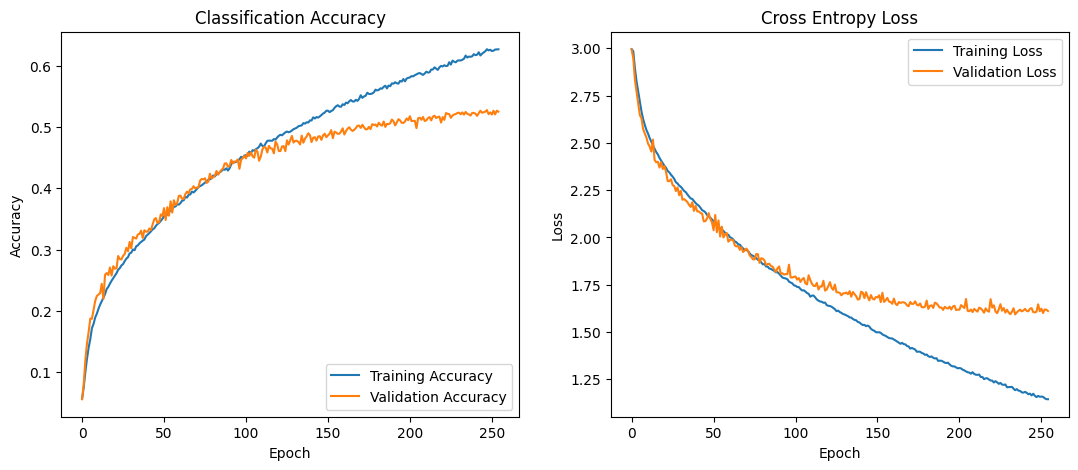

In [30]:
print_acc_loss(history_coarse)

In [31]:
# reverse one-hot encoding
y_pred_coarse_cnn = np.argmax(y_pred_coarse_cnn, axis = 1)

##### **Classification report**

Interpretation of classification report:

Some of the coarse classes that are most confused are: fish, flowers, insects, non-insect invertebrates, and reptiles.

On the other hand, model is good with flower, fruits and vegitables, furniture, outdoor scenes, and trees.


In [32]:
cr_coarse = classification_report(y_test_coarse, y_pred_coarse_cnn)
print(cr_coarse)

              precision    recall  f1-score   support

           0       0.44      0.47      0.45       500
           1       0.53      0.51      0.52       500
           2       0.72      0.73      0.72       500
           3       0.58      0.52      0.55       500
           4       0.65      0.59      0.62       500
           5       0.52      0.46      0.49       500
           6       0.57      0.55      0.56       500
           7       0.58      0.49      0.53       500
           8       0.37      0.50      0.42       500
           9       0.62      0.69      0.65       500
          10       0.69      0.73      0.71       500
          11       0.45      0.48      0.46       500
          12       0.44      0.38      0.40       500
          13       0.40      0.32      0.36       500
          14       0.55      0.61      0.58       500
          15       0.34      0.36      0.35       500
          16       0.32      0.38      0.35       500
          17       0.80    

##### **Confusion matrix**

Most bring yellow diagonal imples most of the images are being classified accurately. Therefore, the model has learned well

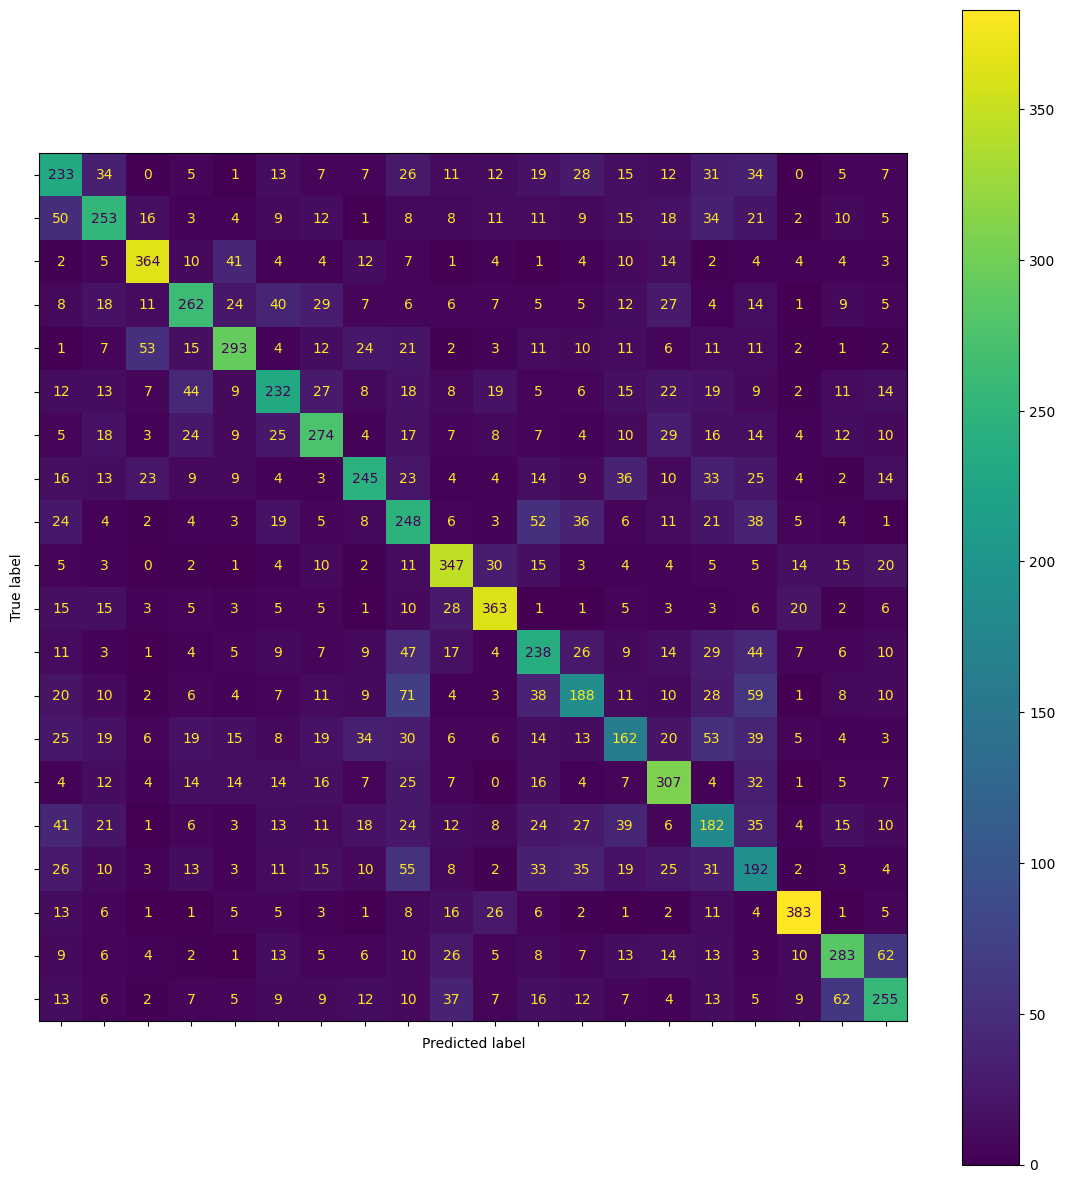

In [33]:
print_confusion_matrix(y_test_coarse, y_pred_coarse_cnn)

Coarse model is missing many labels in the predicted classes below, however, it's also getting many of these correct.

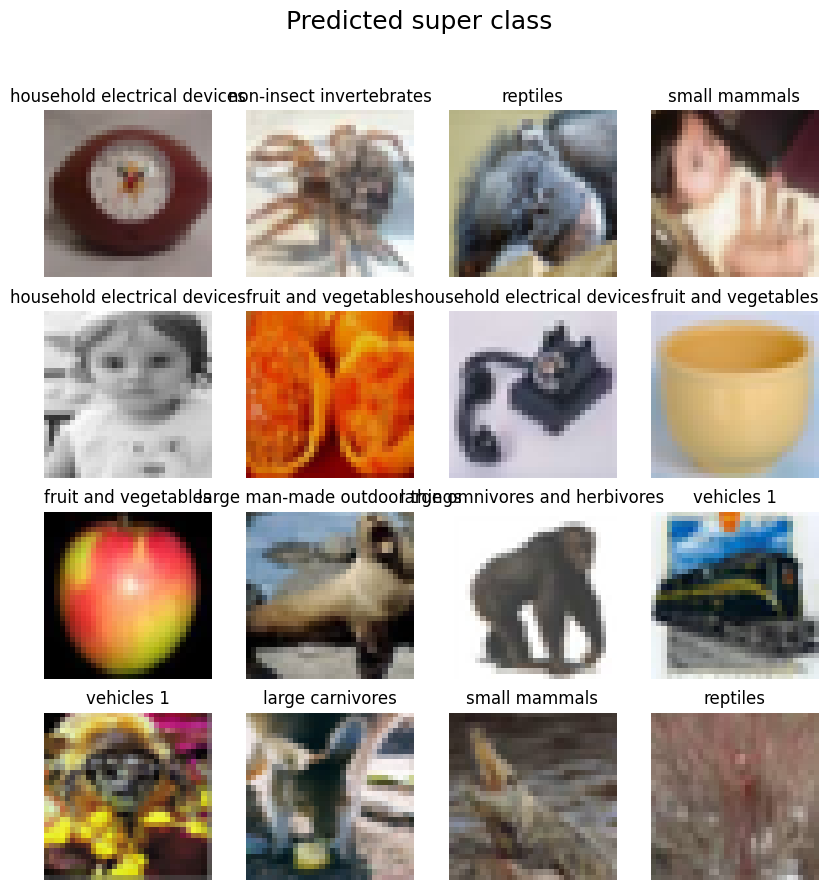

In [34]:
plot_sixteen(x_test, y_pred_coarse_cnn, "Predicted super class", super_class)

### **For finer granularity - Total classes: 100.**
---

In [35]:
model_fine = cnn_seq(num_unique_fine_labels)
model_fine.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [36]:
# One-hot encoding

y_train_fine_sq = keras.utils.to_categorical(y_train_fine, num_unique_fine_labels)
y_test_fine_sq = keras.utils.to_categorical(y_test_fine, num_unique_fine_labels)

In [37]:
learning_rate_scheduler = keras.callbacks.LearningRateScheduler(schedule)
opt = keras.optimizers.RMSprop(learning_rate=0.0001)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=20)

In [38]:
model_fine.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [39]:
history_fine = model_fine.fit(x_train_norm,
                              y_train_fine_sq,
                              batch_size=250,
                              epochs=500,
                              validation_split=0.1,
                              shuffle=True,
                              verbose=1,
                              callbacks=[early_stopping]
                              )

Epoch 1/500
180/180 [==============================] - 8s 31ms/step - loss: 4.6050 - accuracy: 0.0113 - val_loss: 4.6048 - val_accuracy: 0.0120
Epoch 2/500
180/180 [==============================] - 5s 29ms/step - loss: 4.6032 - accuracy: 0.0122 - val_loss: 4.5996 - val_accuracy: 0.0140
Epoch 3/500
180/180 [==============================] - 5s 28ms/step - loss: 4.5713 - accuracy: 0.0195 - val_loss: 4.5168 - val_accuracy: 0.0290
Epoch 4/500
180/180 [==============================] - 5s 29ms/step - loss: 4.4861 - accuracy: 0.0309 - val_loss: 4.4349 - val_accuracy: 0.0408
Epoch 5/500
180/180 [==============================] - 5s 30ms/step - loss: 4.4086 - accuracy: 0.0345 - val_loss: 4.3405 - val_accuracy: 0.0446
Epoch 6/500
180/180 [==============================] - 5s 28ms/step - loss: 4.3420 - accuracy: 0.0420 - val_loss: 4.2624 - val_accuracy: 0.0504
Epoch 7/500
180/180 [==============================] - 5s 29ms/step - loss: 4.2809 - accuracy: 0.0465 - val_loss: 4.2042 - val_accuracy:

#### **Performance**
---

Test accuracy was found to be ```38.61```, 57.7% increase over benchmark value of 24.49%, a significant increase.

In [40]:
score_fine_cnn = model_fine.evaluate(x_test_norm, y_test_fine_sq, verbose=0)
print(f'Test accuracy: {score_fine_cnn[1]*100:0.4f}%')

Test accuracy: 38.6100%


In [41]:
# Create predictions for test data

y_pred_fine_cnn = model_fine.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step


##### **Accuracy and loss curves**

Here again, the validation curve plateaus out, therefore model stops training due to early_stop.

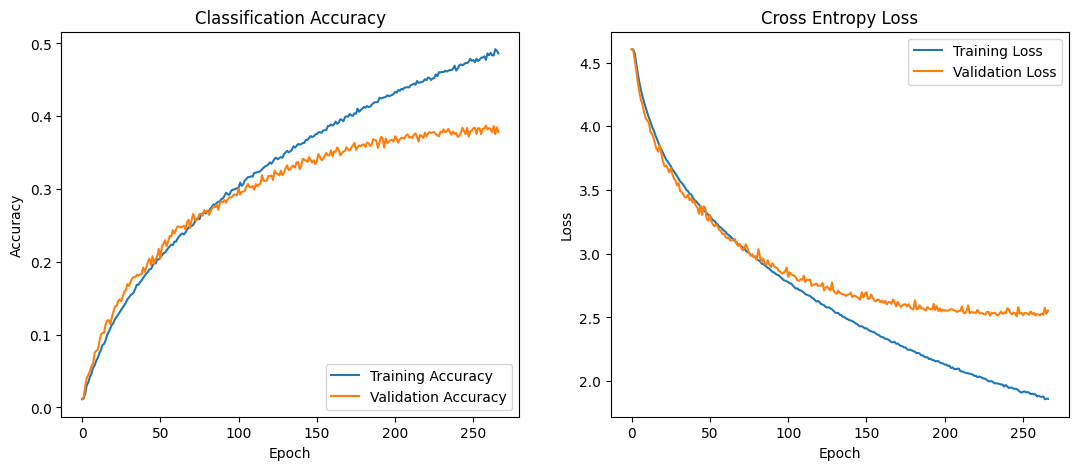

In [42]:
print_acc_loss(history_fine)

In [43]:
# reverse one-hot encoding
y_pred_fine_cnn = np.argmax(y_pred_fine_cnn, axis = 1)

##### **Classification report**

Interpretation of classification report:

Most confused classes are: aquarium fish, baby, bear, beaver, bed, bee, beetle, bicycle, bottles, bowls, boy, bridge, bus, butterfly, camel, cans, castle, caterpillar, cattle, and chair. 

On the other hand fine-grained classes, such as different types of fruits and vegitables, or medium sized mammals. 

In [44]:
cr_fine = classification_report(y_test_fine, y_pred_fine_cnn)
print(cr_fine)

              precision    recall  f1-score   support

           0       0.49      0.73      0.59       100
           1       0.46      0.47      0.47       100
           2       0.25      0.32      0.28       100
           3       0.23      0.15      0.18       100
           4       0.17      0.21      0.19       100
           5       0.27      0.41      0.33       100
           6       0.42      0.39      0.41       100
           7       0.46      0.39      0.42       100
           8       0.43      0.36      0.39       100
           9       0.46      0.46      0.46       100
          10       0.29      0.21      0.24       100
          11       0.35      0.22      0.27       100
          12       0.44      0.39      0.41       100
          13       0.41      0.25      0.31       100
          14       0.27      0.19      0.22       100
          15       0.27      0.28      0.27       100
          16       0.44      0.40      0.42       100
          17       0.52    

##### **Confusion matrix**

The matrix is too big, a slice could have been plotted. Nevertheless, the diagonal is clearly visible as glowing bluish-yellow, meaning classifier is working. For better understanding, use classification report to study the results

[SHORTCOMING] NEEDS BETTER WAY TO VISUALIZE CONFUSION MATRIX

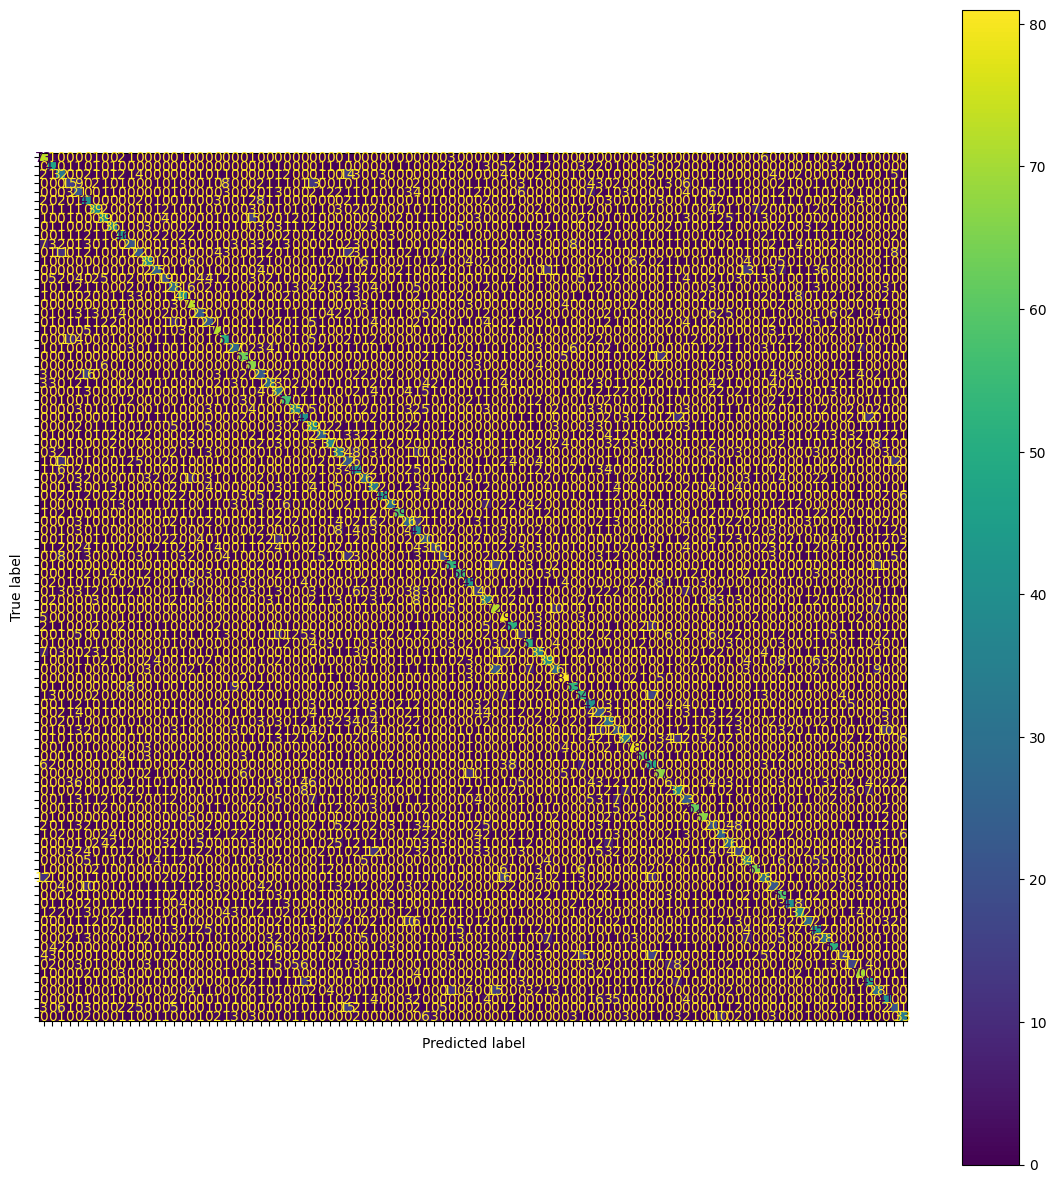

In [45]:
print_confusion_matrix(y_test_fine, y_pred_fine_cnn)

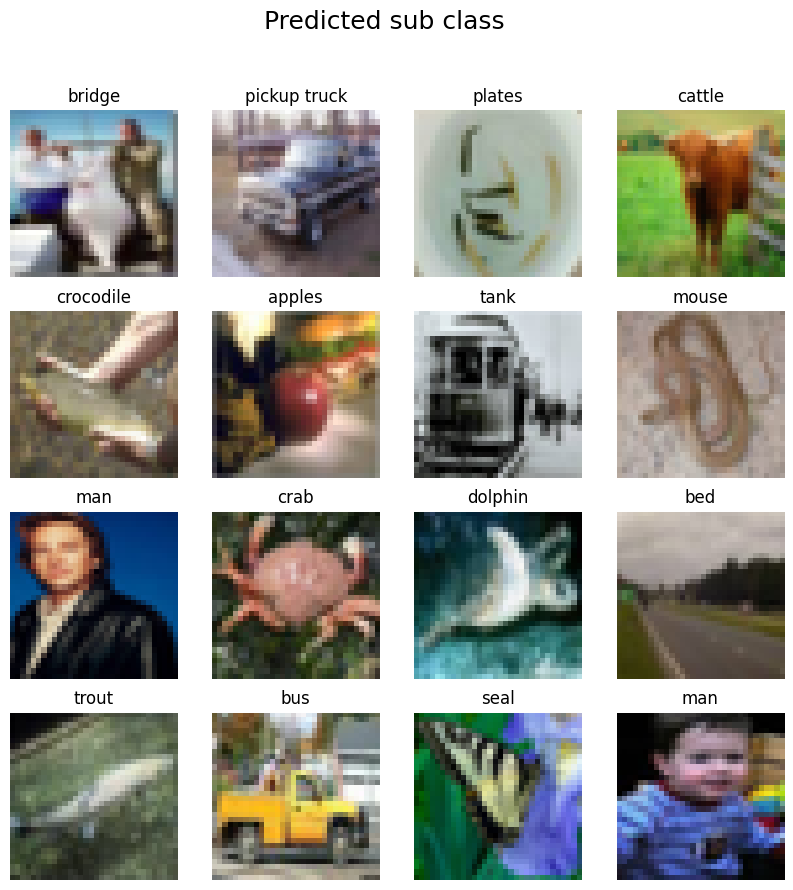

In [46]:
plot_sixteen(x_test, y_pred_fine_cnn, "Predicted sub class", sub_class)

## **METHOD-2 With Support Vector Machine**
---
---

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

### Preprocessing

Flatten the datasets and normalize about the origin with standard deviation of 1.

In [48]:
# Flatten the training and testing dataset from 3D to 2D matrix:
# image_width * image_height * RGB

nsamples, nx, ny, nz = x_train.shape
x_train_d = x_train.reshape((nsamples, nx*ny*nz))

nsamples_tst, nx, ny, nz = x_test.shape
x_test_d = x_test.reshape((nsamples_tst, nx*ny*nz))

print(x_train_d.shape, x_test_d.shape)

(50000, 3072) (10000, 3072)


In [49]:
# normalize training and testing data

scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train_d)
x_test_std = scaler.transform(x_test_d)

#### Principal Component Analysis to determine optimum number of components to keep

In [50]:
from sklearn.decomposition import PCA

In [51]:
def req_var(x, y):
    """
    returns number of dims that retain x% [0, 1] variance
    """

    for i in range(len(y)):
        if y[i] > x:
            optimal_n_components = i
            break
    return optimal_n_components

Text(0.5, 1.0, 'Explained Variance Ratio')

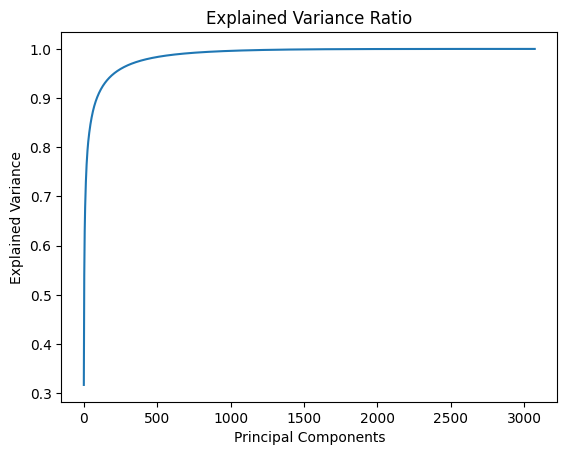

In [52]:
pca = PCA()

pca.fit(x_train_std)

x=range(1, pca.explained_variance_ratio_.shape[0] + 1)
y=np.cumsum(pca.explained_variance_ratio_)
plt.plot(x, y)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')


In [53]:
optimal_n_components = req_var(0.9, y)
print(f"Number of components retaining at least 90% variance: {optimal_n_components}")

Number of components retaining at least 90% variance: 89


Out of 3072 dimensions, we only need 89 dimensions to maintain variance above 90%. A significant and meaningful reduction.

In [54]:
# reduce dimensionality of train and test set
pca_89 = PCA(n_components=optimal_n_components)
x_train_std_89 = pca_89.fit_transform(x_train_std)
x_test_std_89 = pca_89.transform(x_test_std)

### **For Coarser granularity - Total classes: 20**
---

In [55]:
clf_coarse = SVC()

In [56]:
clf_coarse.fit(x_train_std_89, y_train_coarse)

SVC()

#### **Performance**

In [57]:
score_coarse_svm = clf_coarse.score(x_train_std_89, y_train_coarse)
print(f"Score: {score_coarse_svm}")

Score: 0.5039


In [58]:
# Cross-validation score
cv_scores_coarse_svm = cross_val_score(clf_coarse, x_train_std_89, y_train_coarse, cv=10)
print(f"CV average score:  {cv_scores_coarse_svm.mean()}")

CV average score:  0.3742


In [59]:
# predict super class
y_pred_coarse_svm = clf_coarse.predict(x_test_std_89)

##### **Classification report**

The classes that were recognized well are : trees, flowers, and large natural outdoor scenes.

The three least learned classes are: non-insect invertebrates, reptiles and small mammals

In [60]:
cr_coarse_svm = classification_report(y_test_coarse, y_pred_coarse_svm)
print(cr_coarse_svm)

              precision    recall  f1-score   support

           0       0.33      0.34      0.34       500
           1       0.42      0.36      0.39       500
           2       0.53      0.61      0.57       500
           3       0.43      0.38      0.40       500
           4       0.44      0.46      0.45       500
           5       0.34      0.30      0.31       500
           6       0.36      0.42      0.39       500
           7       0.37      0.46      0.41       500
           8       0.25      0.28      0.27       500
           9       0.41      0.49      0.45       500
          10       0.52      0.55      0.54       500
          11       0.31      0.30      0.31       500
          12       0.24      0.27      0.26       500
          13       0.23      0.14      0.18       500
          14       0.37      0.41      0.39       500
          15       0.20      0.18      0.19       500
          16       0.21      0.22      0.21       500
          17       0.62    

##### **Confusion matrix**

The diagonal is well defined, though it does reflect strongly and weakly learned classes that were evident from classification report.

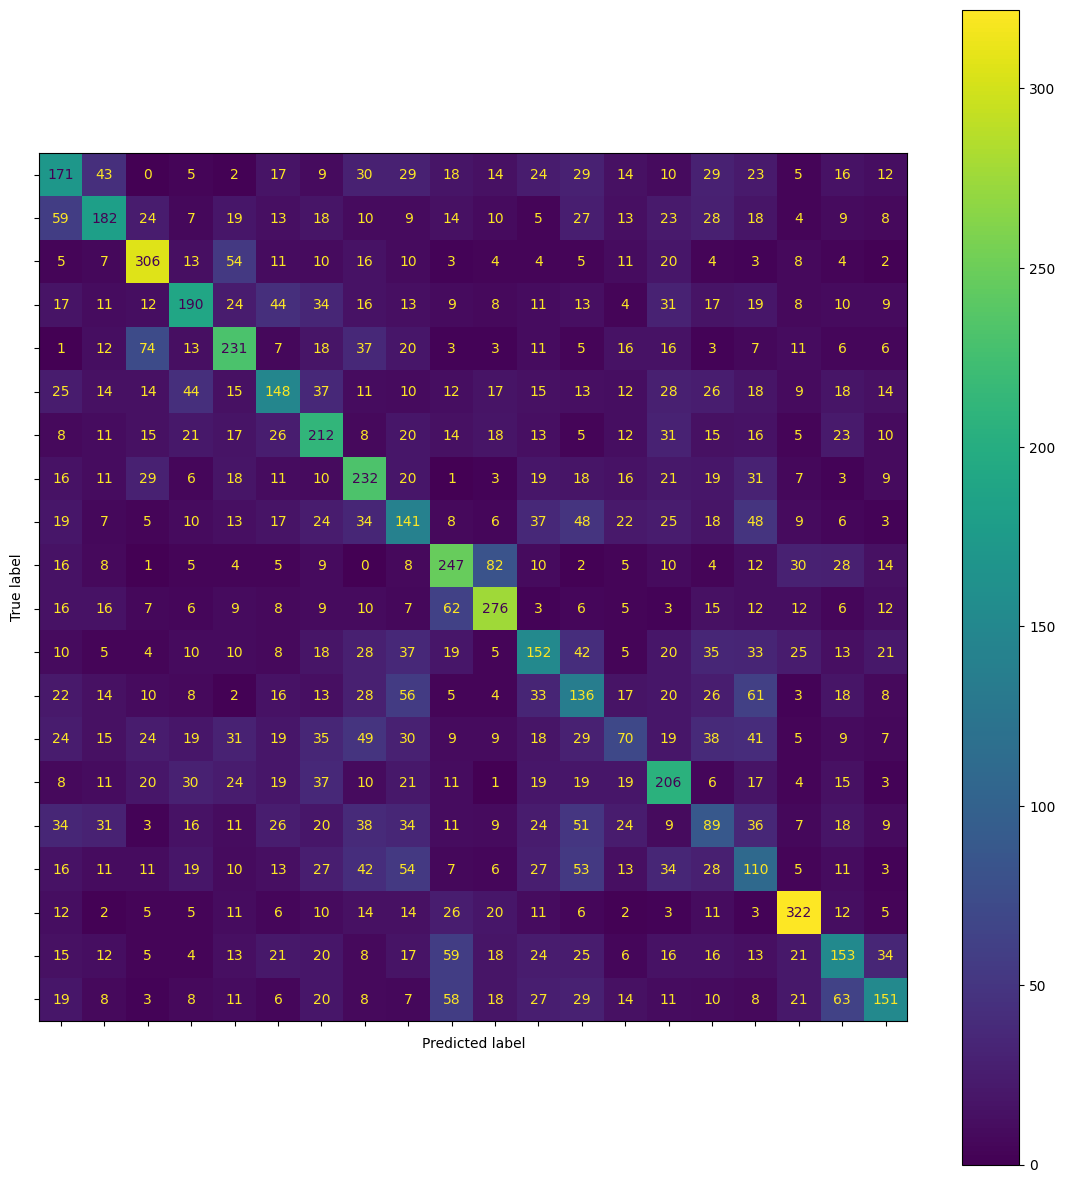

In [61]:
print_confusion_matrix(y_test_coarse, y_pred_coarse_svm)

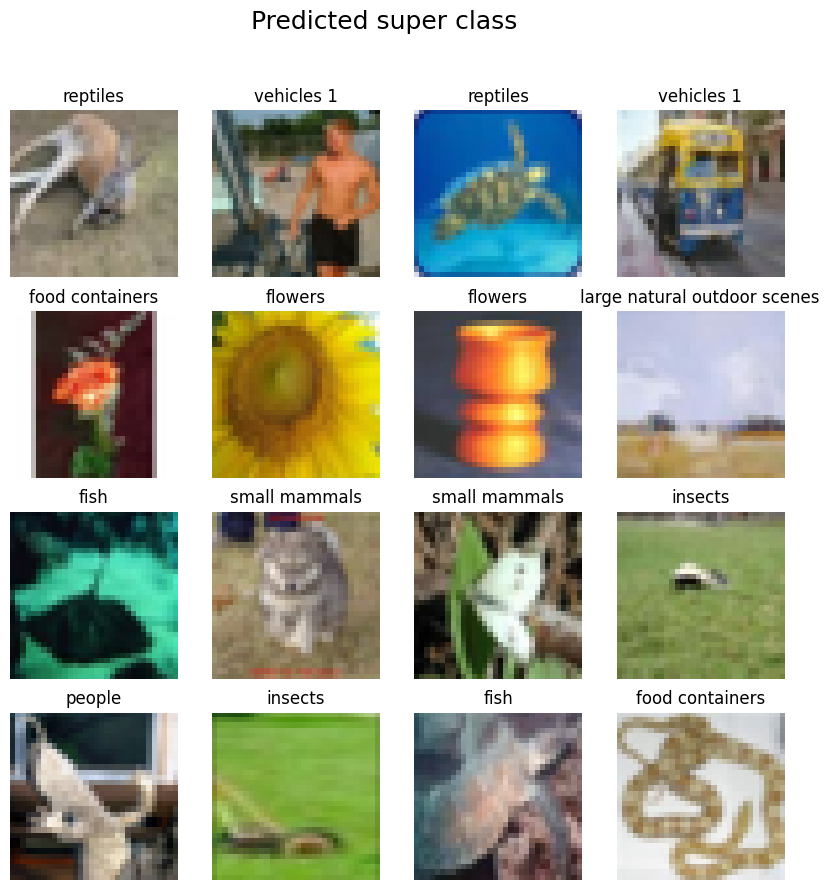

In [62]:
plot_sixteen(x_test, y_pred_coarse_svm, "Predicted super class", super_class)

### **For finer granularity - Total classes: 100**
---

In [63]:
clf_fine = SVC()

In [64]:
clf_fine.fit(x_train_std_89, y_train_fine)

SVC()

#### **Performance**

In [65]:
score_fine_svm = clf_fine.score(x_train_std_89, y_train_fine)
print(f"Score: {score_fine_svm}")

Score: 0.42414


In [66]:
# cross-validation score
cv_scores_fine_svm = cross_val_score(clf_fine, x_train_std_89, y_train_fine, cv=5)
print(f"CV average score:  {cv_scores_fine_svm.mean()}")

CV average score:  0.25158


In [67]:
# predict sub class
y_pred_fine_svm = clf_fine.predict(x_test_std_89)

##### **Classification Report**

The classes that were recognized well are : 0, 20, 41, 82

The four least learned classes are: 50, 65, 88, 98

In [68]:
cr_fine_svm = classification_report(y_test_fine, y_pred_fine_svm)
print(cr_fine_svm)

Classification Report
              precision    recall  f1-score   support

           0       0.47      0.55      0.51       100
           1       0.23      0.40      0.29       100
           2       0.17      0.19      0.18       100
           3       0.14      0.15      0.14       100
           4       0.14      0.22      0.17       100
           5       0.15      0.28      0.19       100
           6       0.18      0.17      0.18       100
           7       0.19      0.27      0.23       100
           8       0.25      0.22      0.23       100
           9       0.44      0.32      0.37       100
          10       0.18      0.08      0.11       100
          11       0.20      0.08      0.11       100
          12       0.30      0.21      0.25       100
          13       0.24      0.23      0.24       100
          14       0.16      0.14      0.15       100
          15       0.18      0.14      0.16       100
          16       0.46      0.25      0.32       100
     

##### **Confusion matrix**

Diagonal is well defined, however, from the classification report, it is clear that the model is struggling with most of the classes.

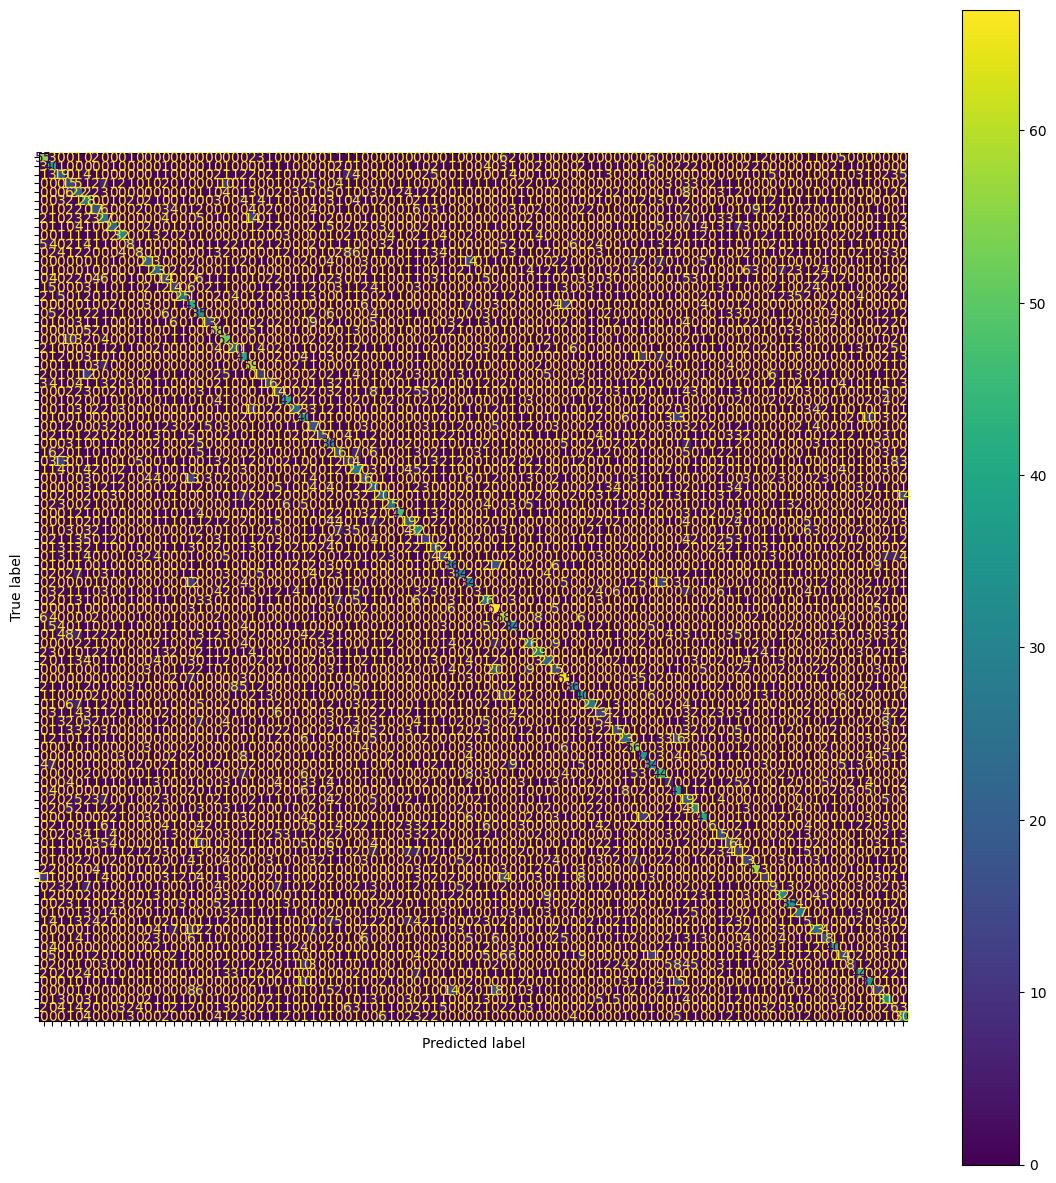

In [69]:
print_confusion_matrix(y_test_fine, y_pred_fine_svm)

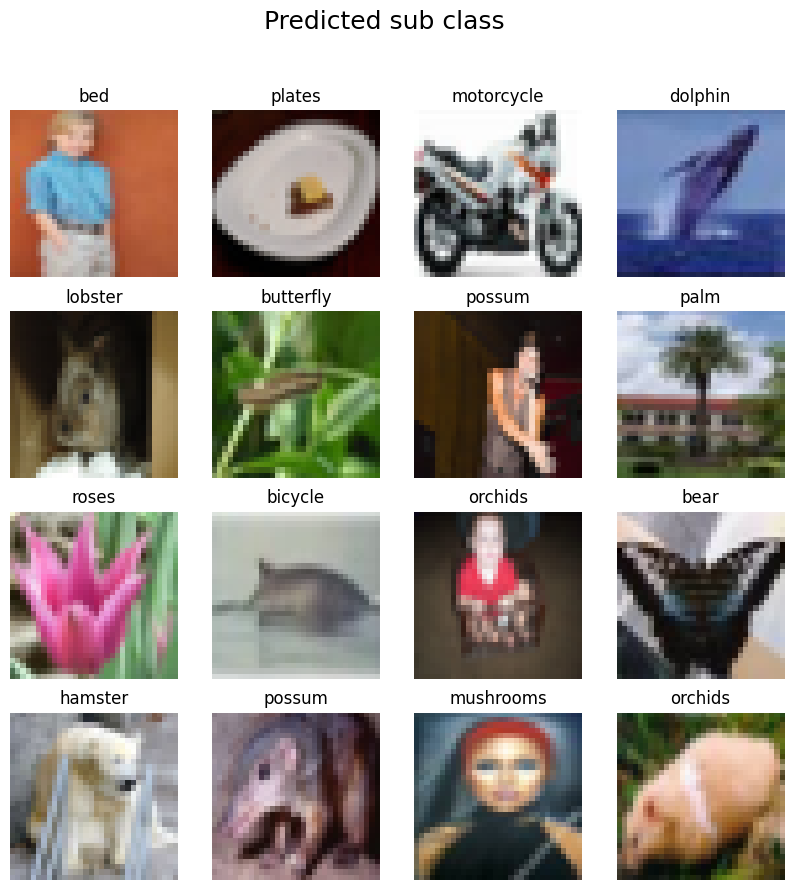

In [70]:
plot_sixteen(x_test, y_pred_fine_svm, "Predicted sub class", sub_class)

---
---

# Appendix

Architecture of the CNN created for super and subclass classification task in the relevent section above.

In [73]:
from keras.utils import plot_model

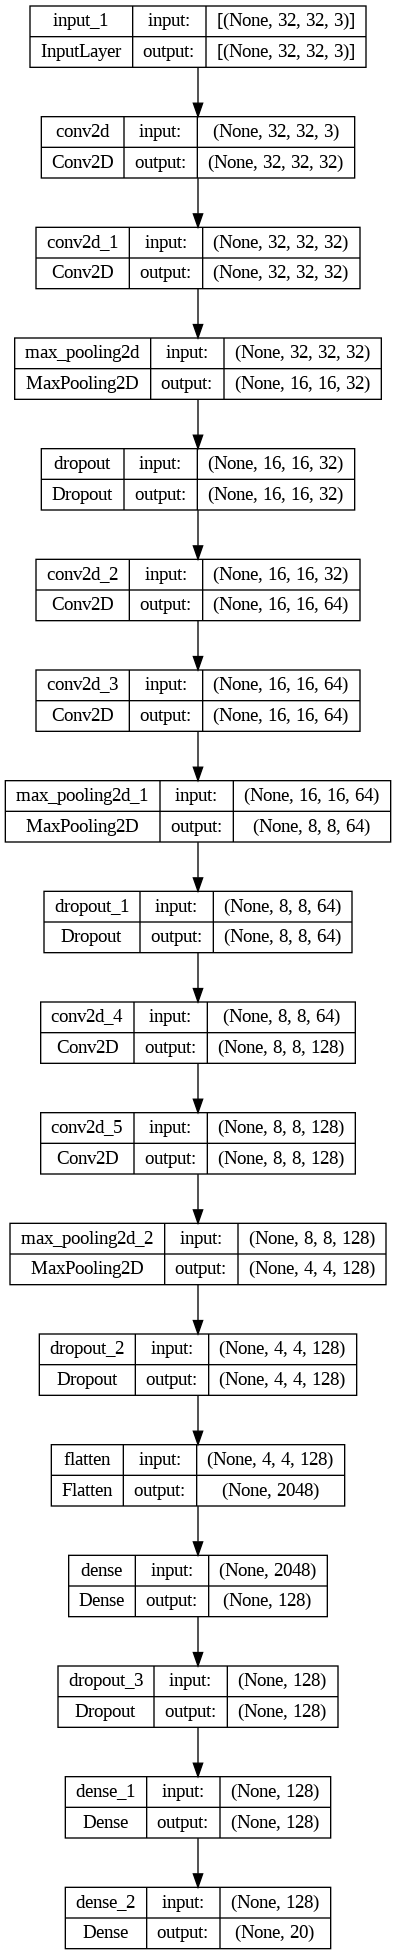

In [74]:
plot_model(model_coarse, to_file=loc+'model.png', show_shapes=True)

---